In [1]:
import pandas as pd
import numpy as np
from numpy.random import randn

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from xgboost import XGBClassifier
from xgboost import plot_importance
from xgboost import plot_importance
from lightgbm import LGBMClassifier
import xgboost as xgb
from lightgbm import plot_importance

from scipy.stats import chi2_contingency
import scipy.stats as stats 
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.api import qqplot, add_constant
from statsmodels.api import Logit
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.proportion import proportions_ztest

import lightgbm as lgb
from subprocess import call
from IPython.display import Image
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from yellowbrick.cluster import SilhouetteVisualizer

import graphviz
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.feature_selection import chi2
from sklearn.inspection import permutation_importance

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import silhouette_samples, silhouette_score
from imblearn.over_sampling import SMOTE

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import warnings
warnings.filterwarnings('ignore')

matplotlib.rc('font', family = 'NanumBarunGothic')
matplotlib.rc('axes', unicode_minus = False)

In [2]:
df_merged = pd.read_csv("/home/piai/merged_with_2.csv", encoding = 'euc-kr')

In [3]:
df_merged.shape

(15390, 56)

In [4]:
df_merged['Ox_Chamber'] = df_merged['Ox_Chamber'].astype(str)
df_merged['Lot_Num'] = df_merged['Lot_Num'].astype(str)
df_merged['Wafer_Num'] = df_merged['Wafer_Num'].astype(str)

df_merged['photo_soft_Chamber'] = df_merged['photo_soft_Chamber'].astype(str)

df_merged['lithography_Chamber'] = df_merged['lithography_Chamber'].astype(str)
df_merged['Wavelength'] = df_merged['Wavelength'].astype(str)

df_merged['Etching_Chamber'] = df_merged['Etching_Chamber'].astype(str)

# Flux480s, Flux840s, RTA_Temp 이산형 확인 .astype('category')
df_merged['Chamber_Num'] = df_merged['Chamber_Num'].astype(str)

df_merged['wafer_defect'] = df_merged['wafer_defect'].astype('category')
df_merged['Line_CD_state'] = df_merged['Line_CD_state'].astype('category')
df_merged['thickness_state'] = df_merged['thickness_state'].astype('category')

In [5]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15390 entries, 0 to 15389
Data columns (total 56 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Ox_Chamber           15390 non-null  object  
 1   type                 15390 non-null  object  
 2   Temp_OXid            15390 non-null  float64 
 3   Vapor                15390 non-null  object  
 4   ppm                  15390 non-null  float64 
 5   Pressure             15390 non-null  float64 
 6   Oxid_time            15390 non-null  float64 
 7   thickness            15390 non-null  float64 
 8   Lot_Num              15390 non-null  object  
 9   Wafer_Num            15390 non-null  object  
 10  photo_soft_Chamber   15390 non-null  object  
 11  resist_target        15390 non-null  float64 
 12  N2_HMDS              15390 non-null  float64 
 13  pressure_HMDS        15390 non-null  float64 
 14  temp_HMDS            15390 non-null  float64 
 15  temp_HMDS_bake     

In [6]:
df_merged.drop(columns=['ppm', 'Defective_Rate_chip', 'merged_Chamber', 'path', 'Error_message', 'Target', 'Lot_Num'], inplace=True)

In [7]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15390 entries, 0 to 15389
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Ox_Chamber           15390 non-null  object  
 1   type                 15390 non-null  object  
 2   Temp_OXid            15390 non-null  float64 
 3   Vapor                15390 non-null  object  
 4   Pressure             15390 non-null  float64 
 5   Oxid_time            15390 non-null  float64 
 6   thickness            15390 non-null  float64 
 7   Wafer_Num            15390 non-null  object  
 8   photo_soft_Chamber   15390 non-null  object  
 9   resist_target        15390 non-null  float64 
 10  N2_HMDS              15390 non-null  float64 
 11  pressure_HMDS        15390 non-null  float64 
 12  temp_HMDS            15390 non-null  float64 
 13  temp_HMDS_bake       15390 non-null  float64 
 14  time_HMDS_bake       15390 non-null  float64 
 15  spin1              

In [8]:
df_merged['wafer_defect'].value_counts()

0    14272
1     1118
Name: wafer_defect, dtype: int64

Accuracy: 0.9997834091401343
Classification Report:
                       precision    recall  f1-score   support

-0.27988426499844893       1.00      1.00      1.00      4270
   3.572905393611684       1.00      1.00      1.00       347

            accuracy                           1.00      4617
           macro avg       1.00      1.00      1.00      4617
        weighted avg       1.00      1.00      1.00      4617


Feature Importances:
            Feature  Importance
0        Temp_OXid    0.229394
19         Thin F4    0.188171
21         Thin F2    0.135755
27         Flux90s    0.059090
17      Resolution    0.052157
..             ...         ...
46    Wafer_Num_14    0.000000
45    Wafer_Num_13    0.000000
44    Wafer_Num_12    0.000000
43    Wafer_Num_11    0.000000
106  Chamber_Num_3    0.000000

[107 rows x 2 columns]


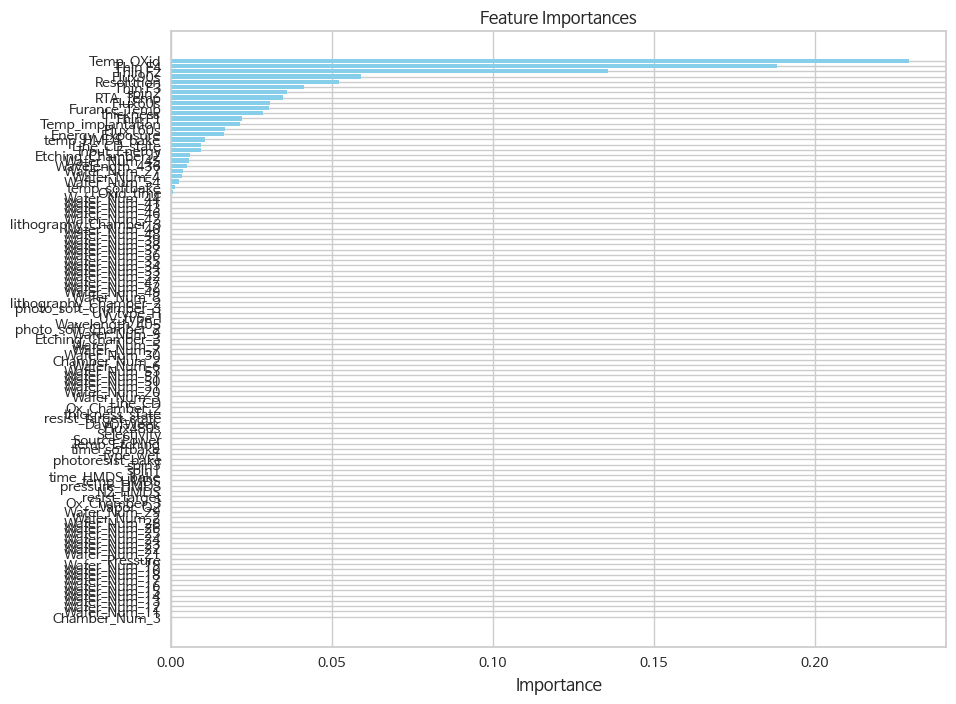

In [9]:
# 데이터프레임 정의
df_char = df_merged.select_dtypes(include="object")
df_numeric = df_merged.select_dtypes(exclude="object")

# 숫자형 데이터 표준화
scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns=df_numeric.columns, index=df_numeric.index)

# 범주형 데이터 원-핫 인코딩
df_encoded = pd.get_dummies(df_char, drop_first=True)

# 최종 데이터프레임 생성
df_final = df_numeric_scaled.join(df_encoded)

# 데이터 분할
df_train, df_test = train_test_split(df_final, test_size=0.3, random_state=1234)

# 타겟 변수와 설명 변수 정의
X_train = df_train.drop(columns='wafer_defect')
y_train = df_train['wafer_defect']
X_test = df_test.drop(columns='wafer_defect')
y_test = df_test['wafer_defect']

# 타겟 변수 인코딩
le_target = LabelEncoder()
y_train_encoded = le_target.fit_transform(y_train)
y_test_encoded = le_target.transform(y_test)

# 모델 학습
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train_encoded)

# 예측
y_pred_encoded = model.predict(X_test)

# 평가
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
target_names = [str(cls) for cls in le_target.classes_]  # 클래스 레이블 문자열로 변환
classification_rep = classification_report(y_test_encoded, y_pred_encoded, target_names=target_names)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

# 피처 중요도 추출
feature_importances = model.feature_importances_

# 피처 이름
feature_names = X_train.columns

# 중요도와 피처 이름을 데이터프레임으로 변환
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# 중요도 기준으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 피처 중요도 출력
print("\nFeature Importances:\n", importance_df)

# 피처 중요도 시각화
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

Accuracy: 1.0
Classification Report:
                       precision    recall  f1-score   support

-0.27988426499844893       1.00      1.00      1.00      4270
   3.572905393611684       1.00      1.00      1.00       347

            accuracy                           1.00      4617
           macro avg       1.00      1.00      1.00      4617
        weighted avg       1.00      1.00      1.00      4617


Feature Importances:
          Feature  Importance
19       Thin F4    0.110944
21       Thin F2    0.072188
0      Temp_OXid    0.051207
20       Thin F3    0.050489
27       Flux90s    0.038918
..           ...         ...
54  Wafer_Num_21    0.000103
83  Wafer_Num_48    0.000101
89  Wafer_Num_53    0.000094
47  Wafer_Num_15    0.000047
69  Wafer_Num_35    0.000014

[107 rows x 2 columns]


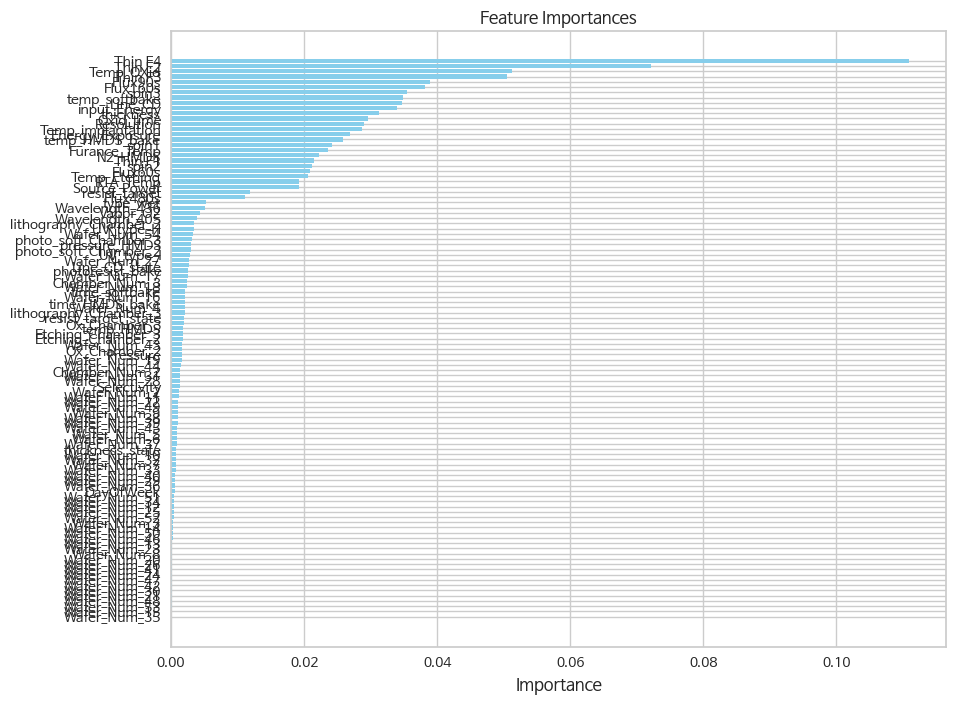

In [10]:
# 랜덤 포레스트 모델 학습
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train_encoded)

# 예측
y_pred_encoded = rf_model.predict(X_test)

# 평가
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
target_names = [str(cls) for cls in le_target.classes_]  # 클래스 레이블 문자열로 변환
classification_rep = classification_report(y_test_encoded, y_pred_encoded, target_names=target_names)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

# 피처 중요도 추출
feature_importances = rf_model.feature_importances_

# 피처 이름
feature_names = X_train.columns

# 중요도와 피처 이름을 데이터프레임으로 변환
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# 중요도 기준으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 피처 중요도 출력
print("\nFeature Importances:\n", importance_df)

# 피처 중요도 시각화
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()